In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('train.tsv', sep='\t') # reading the train.tsv file

In [ ]:
df.head() # checking the data

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB
None


In [ ]:
no_of_exp_sentiments = df['Sentiment'].value_counts() # counting number of expressed sentiments by category
print(no_of_exp_sentiments)

Sentiment
2    79582
3    32927
1    27273
4     9206
0     7072
Name: count, dtype: int64


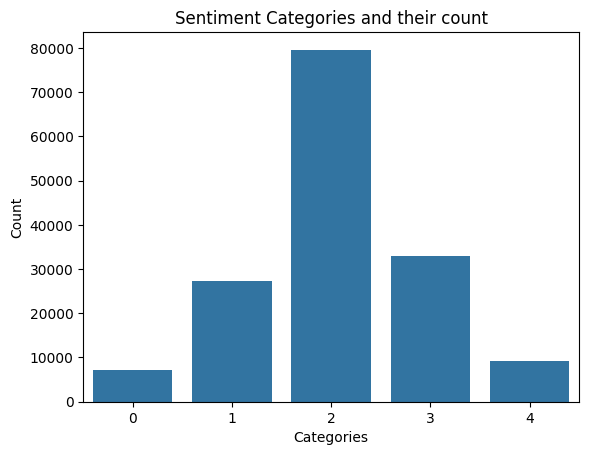

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(x='Sentiment', data=df) # plotting a bar graph of Sentiment Categories and their count
plt.xlabel('Categories')
plt.title('Sentiment Categories and their count')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()


In [ ]:

from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(token_pattern=r'\b[a-zA-Z]+\b') # initializing CountVectorizer & removing symbols and numbers


X = vectorizer.fit_transform(df['Phrase']) # transforming the 'Phrase' column into a sparse matrix

print(X.shape)
# print(X[5])

feature_names = vectorizer.get_feature_names_out() # getting the feature names (words in the vocabulary)


df_matrix = pd.DataFrame(X.toarray(), columns=feature_names) # converting the matrix to a pd dataframe to make it more readable

print(df_matrix.head()) # checking the data


(156060, 15121)
   a  aaa  aaliyah  aan  abagnale  abandon  abandoned  abbass  abbott  \
0  2    0        0    0         0        0          0       0       0   
1  1    0        0    0         0        0          0       0       0   
2  1    0        0    0         0        0          0       0       0   
3  1    0        0    0         0        0          0       0       0   
4  0    0        0    0         0        0          0       0       0   

   abbreviated  ...  ziyi  zoe  zombie  zone  zoning  zoolander  zoom  zucker  \
0            0  ...     0    0       0     0       0          0     0       0   
1            0  ...     0    0       0     0       0          0     0       0   
2            0  ...     0    0       0     0       0          0     0       0   
3            0  ...     0    0       0     0       0          0     0       0   
4            0  ...     0    0       0     0       0          0     0       0   

   zwick  zzzzzzzzz  
0      0          0  
1      0      

In [ ]:
from sklearn.model_selection import train_test_split


y = df['Sentiment'] # defining the target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # splitting the data


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


nb = MultinomialNB() # initializig the Multinomial Naive Bayes instance
nb.fit(X_train, y_train) # fitting the model
y_pred = nb.predict(X_test) # predicting


accuracy = accuracy_score(y_test, y_pred) # accuracy calculation
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.61


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(token_pattern=r'\b[a-zA-Z]+\b') # initializing the TfidfVectorizer



X_tfidf = tfidf_vectorizer.fit_transform(df['Phrase']) # fitting & transforming the data


X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.3, random_state=42) # splitting the data again for TF-IDF


In [ ]:
nb_tfidf = MultinomialNB() # initializing the Multinomial Naive Bayes model for TF-IDF


nb_tfidf.fit(X_train_tfidf, y_train_tfidf) # fitting on the training data



y_pred_tfidf = nb_tfidf.predict(X_test_tfidf) # predicting


accuracy_tfidf = accuracy_score(y_test_tfidf, y_pred_tfidf) # accuracy calculation
print(f"TF-IDF Model Accuracy: {accuracy_tfidf:.2f}")


TF-IDF Model Accuracy: 0.58


<H2>Sentiment analysis with transformer<H2?

In [ ]:
!pip install transformers torch


In [ ]:
import torch
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis") # initializing the sentiment-analysis pipeline

# passing thr article
article_text = """
Claudine Gay resigned Tuesday as Harvard’s president after weeks of controversy
initially sparked by her testimony at a congressional hearing on antisemitism, and later
focusing on allegations of plagiarism in work she had produced throughout her academic
career. (Gay’s resignation was first reported by the Harvard Crimson.) Plagiarism is a
particularly serious charge in academia: In 2021, the president of the University of South
Carolina, Lt. Gen. Robert L. Caslen Jr., resigned after admitting that he had plagiarized a
commencement speech. Plagiarism includes a broad range of possible offenses, from
improperly placing a citation to claiming credit for another scholar’s research or insight,
and individual institutions develop their own policies for evaluating and responding to
allegations of research misconduct. Gay defended her academic record in an op-ed
published Wednesday in the New York Times, saying that she addressed attribution
issues promptly after learning about them, and that “I have never misrepresented my
research findings, nor have I ever claimed credit for the research of others. Moreover,
the citation errors should not obscure a fundamental truth: I proudly stand by my work
and its impact on the field.”
"""


sentiment_result = sentiment_pipeline(article_text) # processing sentiment

print(sentiment_result)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.8526297211647034}]


<H2>The out put from watson model<H2>
<H2>Sentiment: negative, Score: -0.632673<H2>

In [15]:
"""
Yes there is a difference in results

output from ibm watson
Sentiment: negative, Score: -0.632673

output from transformer model(hugging face)
{'label': 'POSITIVE', 'score': 0.8526297211647034}]




I think the difference in results between IBM Watson and the transformer model is due to their different approaches.
IBM Watson uses a rule-based approach with pre-defined lexicons,
where as the transformer models use deep learning techniques to learn from data.
The transformer model's ability to understand context and complex language patterns might be te reason which gave a more positive sentiment in this case.
"""

'\nYes there is a difference in results\n'